In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

df = pd.read_csv(r"/content/GlobalWeatherRepository.csv")
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


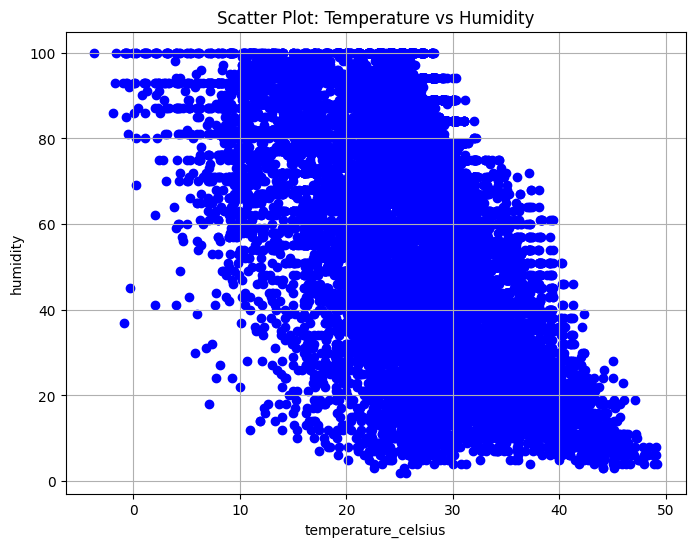

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_celsius'], df['humidity'], color='blue')
plt.title('Scatter Plot: Temperature vs Humidity')
plt.xlabel('temperature_celsius')
plt.ylabel('humidity')
plt.grid(True)
plt.show()

In [ ]:
corr_coef, p_value = pearsonr(df['temperature_celsius'], df['humidity'])
print(f"Pearson's Correlation Coefficient: {corr_coef:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson's Correlation Coefficient: -0.49
P-value: 0.0000


In [ ]:
X = df[['temperature_celsius']]  # Independent variable
y = df['humidity']       # Dependent variable

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Regression results
intercept = model.intercept_
slope = model.coef_[0]
r_squared = r2_score(y, y_pred)

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-squared value: {r_squared:.2f}")
print(f"R-squared value:")

Intercept: 105.69
Slope: -1.75
R-squared value: 0.24


In [ ]:
X = df[['temperature_celsius']]  # Independent variable
y = df['humidity']       # Dependent variable

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)

# Regression results
intercept = model.intercept_
slope = model.coef_[0]
r_squared = r2_score(y, y_pred)

print(f"Intercept: {intercept:.2f}")
print(f"Slope: {slope:.2f}")
print(f"R-squared value: {r_squared:.2f}")

Intercept: 105.69
Slope: -1.75
R-squared value: 0.24


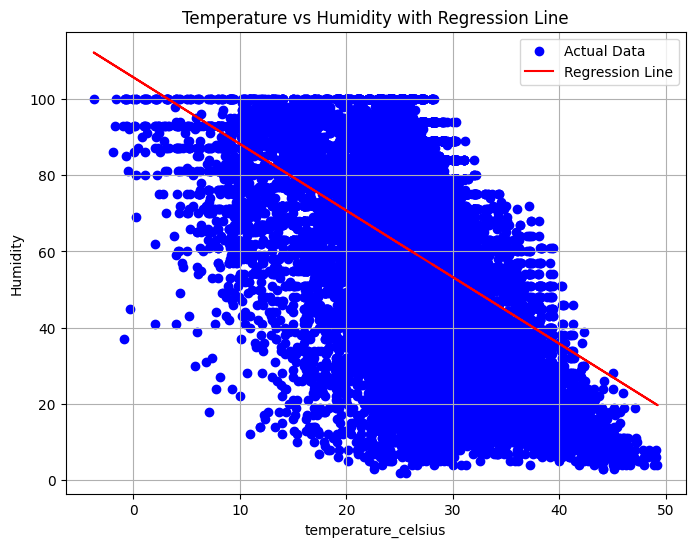

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_celsius'], df['humidity'], color='blue', label='Actual Data')
plt.plot(df['temperature_celsius'], y_pred, color='red', label='Regression Line')
plt.title('Temperature vs Humidity with Regression Line')
plt.xlabel('temperature_celsius')
plt.ylabel('Humidity')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px
zone = ['Asia/Kabul', 'Europe/Tirane', 'Africa/Algiers', 'Europe/Andorra','Africa/Luanda', 'America/Antigua','America/Argentina/Buenos_Aires','Australia/Sydney',
        'Europe/Vienna','Asia/Bahrain', 'Asia/Dhaka','Europe/Brussels', 'America/Belize','America/Manaus', 'Asia/Brunei','Africa/Ouagadougou','Atlantic/Cape_Verde',
        'Asia/Phnom_Penh', 'Africa/Douala', "Asia/Bangkok"]
weather_zones = df.query("timezone in @zone")
fig = px.scatter(
    df,
    x="temperature_celsius",
    y="humidity",
    color="temperature_celsius",
    color_continuous_scale = "tempo",
    size='wind_kph', # Size of data points based on wind speed in kph
    hover_name='country', # Add hover value
    hover_data=['location_name'],  # Additional data to show on hover (location_name)
    labels=
        {
            'temperature_celsius': 'Temperature (°C)',
            'humidity': 'Humidity',
            'wind_kph': 'Wind speed (kph)',
            'country': 'Country',
            'condition_text': 'Weather Condition',
            'location_name': 'City'
        },
    title="Temperature and Humidity",
    height=600,
    )

fig.update_xaxes(title="Temperature (°C)")
fig.update_yaxes(title="Humidity")


fig.show()

qweqwe